In [1]:
#Программа факторного анализа

# Import required libraries
#from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import FactorAnalysis,PCA
from sklearn.cluster import KMeans
from scipy import stats


In [2]:
df = pd.read_excel("CarData1Lab.xlsx") #читаем данные, файл должен находиться в одной папке с данным блокнотом
#df.info() # инфо по столбцам, видим что есть столбцы в котором часть значений отсутствует
#df.isnull().sum() #количество пустых элементов в каждом из столбцов

df = df.dropna() #удаляем строки с пропусками
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 154
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        149 non-null    object 
 1   mpg         149 non-null    float64
 2   cylinders   149 non-null    int64  
 3   displace    149 non-null    int64  
 4   horsepower  149 non-null    float64
 5   accel       149 non-null    float64
 6   year        149 non-null    int64  
 7   weight      149 non-null    int64  
 8   origin      149 non-null    int64  
 9   make        149 non-null    object 
 10  model       149 non-null    object 
 11  price       149 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 15.1+ KB


0       Volkswagen Rabbit Dl
1                Ford Fiesta
4           Honda Civic CVCC
22        Chevrolet Chevette
35          Honda  Accord LX
51         Dodge  Colt Hatch
60               Fiat Strada
65        Volkswagen  Rabbit
67        Chevrolet Chevette
73                 Audi 4000
81     Volkswagen  Rabbit Dl
82     Volkswagen  Dasher Dl
85         Honda  Civic1500G
87                 Subaru DL
105              Mazda GLC 4
107           Ford Escort 4W
108           Ford Escort 2H
133         Mazda GLC Cust l
134         Mazda GLC Custom
136           Mercury Lynx l
140           Honda  Civic M
141           Honda  Civic A
142            Datsun 310 GX
151       Volkswagen  Pickup
Name: name, dtype: object

Исходные данные
       mpg  cylinders  displace  horsepower  accel  year  weight  price
0    43.1          4        90        48.0   21.5    78    1985   2400
1    36.1          4        98        66.0   14.4    78    1800   1900
4    36.1          4        91        60.0   16

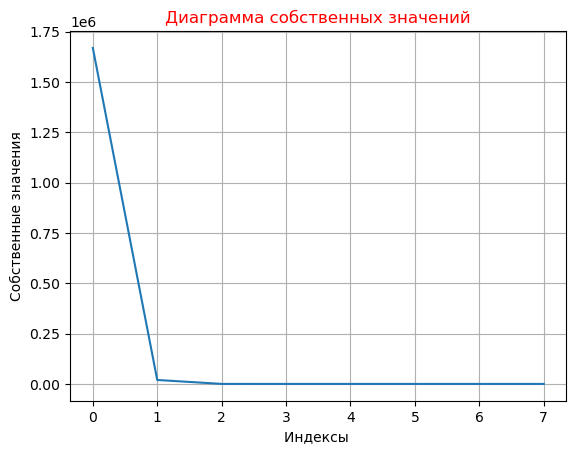

(8,)


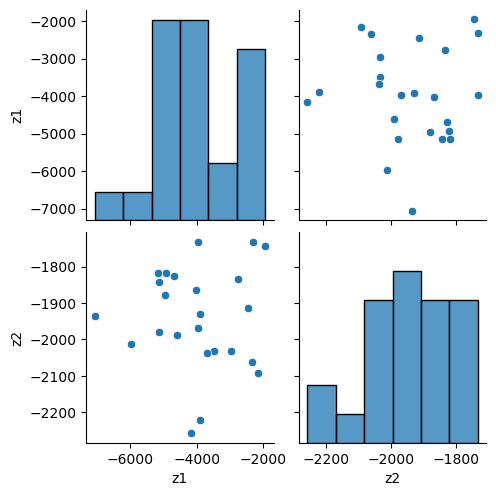



------------ПЕРЕХОД К СТАНДАРТИЗОВАННЫМ ПЕРЕМЕННЫМ---------------

Стандартизованные данные

       mpg  displace  horsepower  accel   year  weight  price
0    1.370    -1.180      -2.024  1.403 -1.469  -0.497 -1.183
1   -0.085     1.041       0.068 -0.969 -1.469  -1.771 -1.570
4   -0.085    -0.902      -0.629 -0.301 -1.469  -1.771 -1.299
22  -1.353     1.041       0.300 -0.267 -1.469   0.674 -1.415
35  -1.457     1.041       0.300 -0.234 -1.469   0.536 -0.389
51  -0.168     1.041       1.694 -0.969 -0.804  -0.979 -0.950
60   0.165    -0.902       0.416 -0.868 -0.804   0.502 -1.280
65   1.037     1.041       1.230 -0.868 -0.139   0.598  2.380
67  -0.916     1.041       0.533 -0.601 -0.139   0.433 -0.795
73  -0.459     0.763       1.462 -0.501 -0.139   0.901  1.528
81   1.619    -1.180      -2.024  1.470 -0.139   0.192 -0.021
82   1.432    -1.180      -2.024  2.138 -0.139   1.914 -0.079
85   1.682    -0.902       0.184 -1.169 -0.139  -1.427 -0.002
87  -0.563     0.763       0.184  0.2

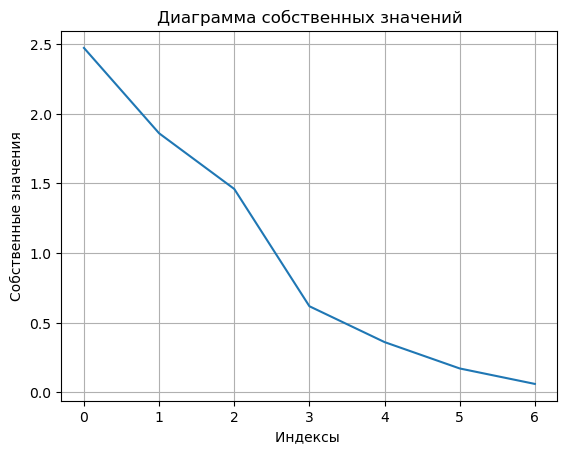


Значения сохраненныхглавных компонент:
           z1        z2        z3
0  -2.594709  2.477882 -0.283097
1   1.555925  2.447361  0.061885
2   0.071558  2.676486  0.761052
3   1.526644  1.170721 -1.946449
4   1.492552  0.547691 -1.655161
5   2.269982  0.975032  0.138457
6   0.446578  1.245418  0.008818
7   0.819056 -1.941361  0.403941
8   1.443191  0.103958 -0.966461
9   1.358428 -1.703974 -0.341838
10 -3.117868  0.705955  0.033512
11 -3.632722  0.009453 -1.322450
12 -0.133503  1.001363  2.173398
13  0.463274 -0.238260 -1.059023
14  0.301326 -0.084428  0.998008
15  0.690873 -0.402573 -0.308116
16 -0.037677 -1.635497 -2.462922
17 -0.556319 -1.044650  1.098196
18  0.159042 -1.111049  1.112518
19  0.460914 -1.483522 -0.273348
20 -0.065357 -0.607028  1.729958
21  0.359137 -0.881154  1.363499
22 -0.338781 -0.946036  1.540765
23 -2.941544 -1.281788 -0.805141

Диаграмма рассеяния в пространстве главных компонент стандартизованных переменных


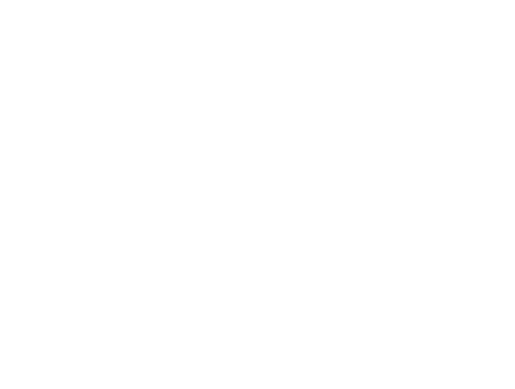

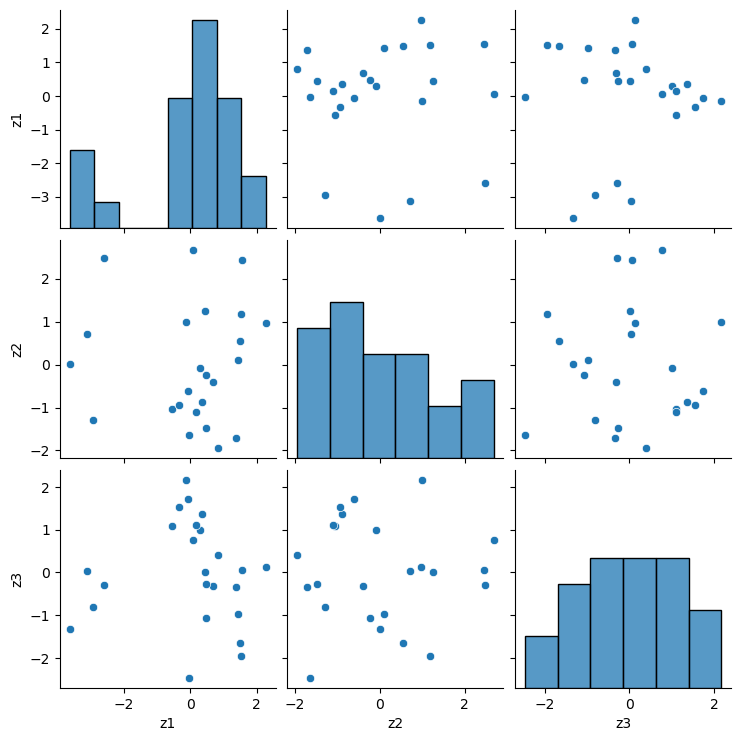

In [3]:

#-------------------МЕТОД ГЛАВНЫХ КОМПОНЕНТ----------------------------------------------
def sum_of_squares_above_diagonal(matrix):#функция подсчёта суммы квадратов наддиагональных элем.
    n = len(matrix)  # Размер матрицы
    sum_squares = 0
    
    # Проход по всем элементам над диагональю
    for i in range(n):
        for j in range(i + 1, n):
            sum_squares += matrix[i][j] ** 2
    
    return sum_squares

porog = 0.8
data=df.query('displace >= 90 & displace <= 99') # в данном случае отбираются только автомобили со страной производства с кодом 1 (США)
#data.info()
data_txt = data['name'] # имена объектов
print(data_txt)
data1=data.drop(['make','model','name','origin'],axis=1) #удаляем столбцы с качественными переменными 

#---------------РАБОТА С ИСХОДНЫМИ ПЕРЕМЕННЫМИ (файл data1)--------------------------------------

z1 = np.cov(data1.T.round(3)) # подсчёт ковариационной матрицы
print('\nИсходные данные\n',data1)
#print('\nКовариационная матрица ')
#print('z1:\n',z1)
print('\nДиагональные элементы ковариационной матрицы:')
ss=0
for i in range (data1.shape[1]):
    print('   '*(i+1),round(z1[i,i],3))
    ss=ss+z1[i,i]
print('\nСумма диагоналных элементов ковариационной матрицы =',round(ss,3))

v1,values1 = LA.eigh(z1) # вычисления собственных векторов и собственных значений

v2 = v1[::-1] #переупорядочение собственных значений по убыванию
#print('v2.dtype:',v2.dtype)
print('\nСобственные значения ковариационной матрицы \n',*v2.round(3))
print('\nСобственные векторы ковариационной матрицы:\n',values1.round(3))
ncol = data1.shape[1]
#print('ncol=',ncol)
s = 0; kz=0 # kz - число остающихся главных комонент
s1 = v2.sum()
print('Сумма собственных значений ковариационной матрицы =',round(s1,3))
print('\nДоля дисперсии, приходящаяся на первые k компонент:')
for i in range(ncol):
    s = s+v2[i]/s1
    if s < porog: #порог отсечения числа главных компонент
        kz = i+1
        print('i,kz =',i,kz)
    print(i+1,'- компонент(ы)',round(s,6))
if kz == 0:
    kz = 1
print('\nncol = ',ncol,'kz = ',kz)

ev = list(range(v1.shape[0])) #формирование индексов переменных

plt.plot(ev, v2) #печать диаграммы собственных значений
plt.title('Диаграмма собственных значений',color='red')
plt.xlabel('Индексы ')
plt.ylabel('Собственные значения')
plt.grid()
plt.show()

feature_names = data1.columns
print(feature_names.shape)

Z_value = data1.dot(values1) # получение матрицы значений главных компонент
#print ('\nЗначения главных компонент:\n',Z_value)
dispers = Z_value.sem() #дисперсии главных компонент
dispers1 = dispers[::-1] # упрядочение дисперсий по убыванию
#print('dispers,dispers1 = \n',dispers,dispers1)

i1 = [0]*(kz+1) #здесь будут храниться номера столбцов с максимальной дисперсией
#print('\ni1 = ',i1)
for i in range(kz+1):
    for j in range(ncol):
        #print('i,j,ncol',i,j,ncol)
        if (dispers[j] <= 1.01*dispers1[ncol-1-i]) and (dispers[j] >= 0.99*dispers1[ncol-1-i]):
            #print('j,dispers[j],dispers1[j]',j,dispers[j],dispers1[j])
            i1[i] = j
            #print('i1,j = ',i1,j)
            
Z1_numpy = Z_value.values # перевод dataframe в массив numpy
#print('Z1_numpy.shape =',Z1_numpy.shape[0])
k = Z1_numpy.shape[0] #число объектов

Z11 = np.zeros((k,kz+1)) # в Z11 будут храниться значения первых  главных компонент

for i in range(k):
    for j in range(kz+1):
        Z11[i,j] =Z1_numpy[i,i1[j]]        
#print('\nЗначения сохраненныхглавных компонент:\n   ',Z11.round(2))
nam = ['z']*(kz+1)
for i in range(kz+1):
    nam[i] = 'z'+ str(i+1)
#print('nam =',nam)
Z11df = pd.DataFrame(data = Z11,columns=nam) # Z11df - dataframe c первыми  гл.компонентами
#print(Z11df)    
    
# Диаграммы рассеяния
#fig, ax = plt.subplots(figsize=(15, 15))
sns.pairplot(Z11df)
#plt.axis('equal')
plt.show()



  

print('\n\n------------ПЕРЕХОД К СТАНДАРТИЗОВАННЫМ ПЕРЕМЕННЫМ---------------')

# Находим столбцы с более чем одним уникальным значением
data1 = data1.loc[:,data1.nunique() > 1]
data2 = (data1-data1.mean ())/data1.std()# стандартизация данных

print('\nСтандартизованные данные\n')
print(data2.round(3))
z = np.cov(data2.T.round(3)) # получение корреляционной матрицы переменных
print('\nКорреляционная матрица ')
print(z.round(3))

result = sum_of_squares_above_diagonal(z)
print("\nСумма квадратов наддиагональных элементов:", round(result,3))

v,values = LA.eigh(z) # вычисления собственных векторов и значений
v1 = v[::-1] #переупорядочение собственных значений по убыванию
print('\nСобственные значения корреляционной матрицы \n',v1.round(3))

ncol = data2.shape[1]
s = 0; kz=0
s1 = v1.sum()
print('Сумма собственных значений корреляционной матрицы =',round(s1,3))
print('\nДоля дисперсии, приходящаяся на первые k компонент:')
for i in range(ncol):
    s = s+v1[i]/s1
    if s < porog: #порог отсечения числа главных компонент
        kz = i+1
        #print('i,kz =',i,kz)
    print(i+1,'- компонент(ы)',round(s,6))
if kz == 0:
    kz = 1
#print('\nncol = ',ncol,'kz = ',kz)

print('\nСобственные векторы \n',values.round(3))

ev = list(range(v.shape[0])) #формирование индексов переменных

plt.plot(ev, v1) #печать диаграммы собственных значений
plt.title('Диаграмма собственных значений')
plt.xlabel('Индексы ')
plt.ylabel('Собственные значения')
plt.grid()
plt.show()

feature_names = data2.columns
#print(feature_names.shape)

Z_value = data2.dot(values) # получение матрицы значений главных компонент
#print ('Значения главных компонент:\n',Z_value)
dispers = Z_value.sem() #дисперсии главных компонент
dispers1 = dispers[::-1] # упрядочение дисперсий по убыванию
#print('dispers,dispers1 = \n',dispers,dispers1)

i1 = [0]*(kz+1) #здесь будут храниться номера столбцов с максимальной дисперсией
#print('\ni1 = ',i1)
for i in range(kz+1):
    for j in range(ncol):
        #print('i,j,ncol',i,j,ncol)
        if (dispers[j] <= 1.01*dispers1[ncol-1-i]) and (dispers[j] >= 0.99*dispers1[ncol-1-i]):
            #print('j,dispers[j],dispers1[j]',j,dispers[j],dispers1[j])
            i1[i] = j
            #print('i1,j = ',i1,j)
            
Z1_numpy = Z_value.values # перевод dataframe в массив numpy
#print('Z1_numpy.shape =',Z1_numpy.shape[0])
k = Z1_numpy.shape[0]
Z11 = np.zeros((k,kz+1)) # в Z11 будут храниться значения первых  главных компонент
#print('\nZ11   ',Z11)

for i in range(k):
    for j in range(kz+1):
        Z11[i,j] =Z1_numpy[i,i1[j]]        

nam = ['z']*(kz+1)
for i in range(kz+1):
    nam[i] = 'z'+ str(i+1)
#print('nam =',nam)
Z11df = pd.DataFrame(data  = Z11,columns=nam) # Z11df - dataframe c первыми  гл.компонентами
#print(Z11df)

print('\nЗначения сохраненныхглавных компонент:\n',Z11df)

plt.box(False); plt.xticks([]); plt.yticks([])# Зачистка экрана


#plt.savefig('fig.png')
    
#plt.title('Диаграмма рассеяния в пространстве главных компонент стандартизованных переменных')
print('\nДиаграмма рассеяния в пространстве главных компонент стандартизованных переменных')
sns.pairplot(Z11df)            
#plt.grid()
plt.show() 




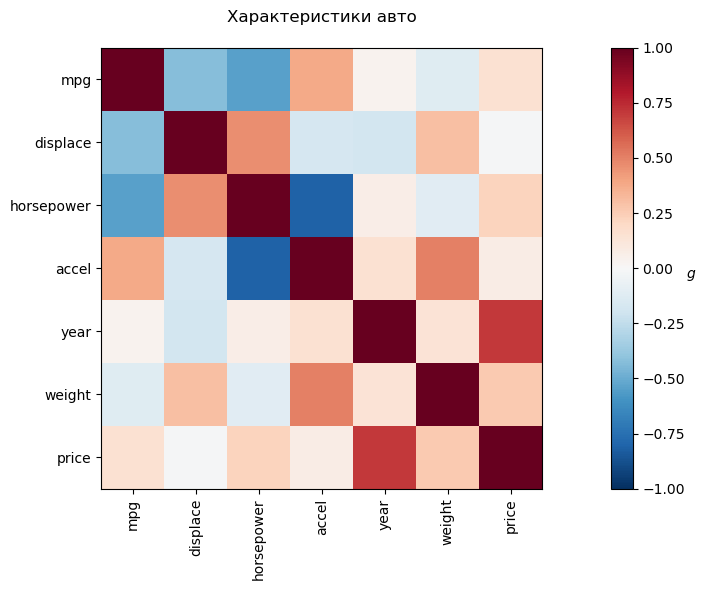

In [4]:
# Распечатка корреляционной матрицы (Тепловая карта)
plt.figure(figsize=(14, 6))

ax = plt.axes()
im = ax.imshow(np.corrcoef(data2.T), cmap="RdBu_r", vmin=-1, vmax=1)
ax.set_xticks(np.arange(0,data2.shape[1]))
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(np.arange(0,data2.shape[1]))
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$g$",rotation=0)
ax.set_title("Характеристики авто\n")
plt.tight_layout()



 PCA :

Компоненты 
 [[ 0.454  0.103]
 [-0.362 -0.156]
 [-0.572 -0.229]
 [ 0.539 -0.089]
 [ 0.137 -0.587]
 [ 0.142 -0.38 ]
 [ 0.081 -0.645]]


 Factor Analysis :

Компоненты 
 [[ 0.522  0.272]
 [-0.443 -0.126]
 [-0.971 -0.036]
 [ 0.785  0.296]
 [-0.093  0.715]
 [ 0.107  0.307]
 [-0.252  0.91 ]]


Text(0.5, 0.98, 'Нагрузки общих факторов')

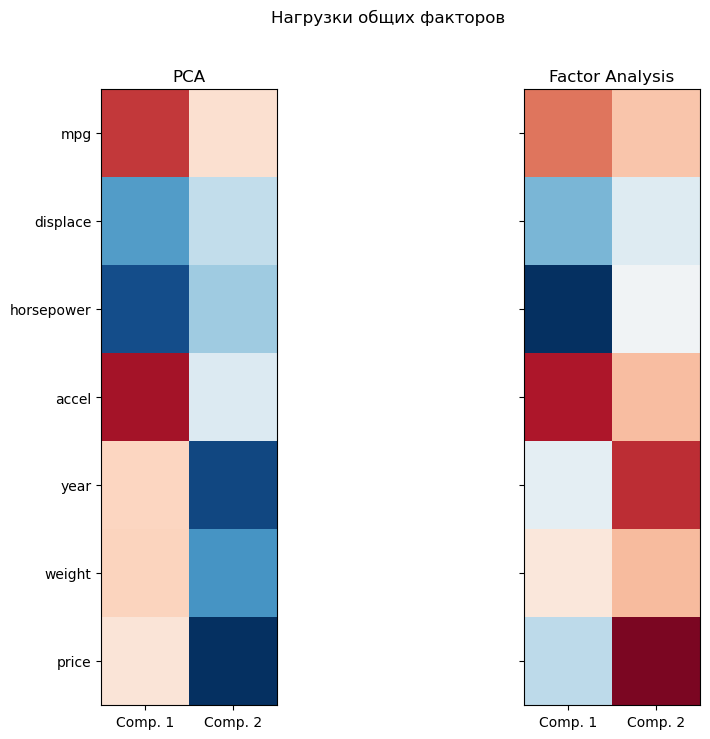

<Figure size 700x100 with 0 Axes>

<Figure size 700x100 with 0 Axes>

In [5]:
n_comps = 2 
 
methods = [ 
    ("PCA", PCA()), 
    ("Factor Analysis", FactorAnalysis()), 
    ] 
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8)) 
 
for ax, (method, fa) in zip(axes, methods): 
    fa.set_params(n_components=n_comps) 
    fa.fit(data2) 
     
    components = fa.components_.T 
    print("\n\n %s :\n" % method) 
    print('Компоненты \n',components.round(3)) 
     
    plt.figure(figsize=(7, 1)) 
 
    vmax = np.abs(components).max() 
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax) 
    ax.set_yticks(np.arange(len(feature_names))) 
    if  ax.get_subplotspec().is_first_col(): 
        ax.set_yticklabels(feature_names) 
    else: 
        ax.set_yticklabels([]) 
    ax.set_title(str(method)) 
    ax.set_xticks([0, 1]) 
    ax.set_xticklabels(["Comp. 1", "Comp. 2"]) 
fig.suptitle("Нагрузки общих факторов") 
#plt.tight_layout() 
#plt.show()

